#Método de Ordenação
*Ordenamento com Bubble Sort*

In [ ]:
import numpy as np
from timeit import default_timer as Timer
from timeit import timeit
from time import perf_counter, sleep
from random import randint
import matplotlib.pyplot as plt
import copy

In [ ]:
#decorator (medir o Tempo)
def medirTempo(funcao):
  def calcula_Tempo(tamanho):
    inicio = perf_counter()
    res = funcao(tamanho)
    fim = perf_counter()
    return res, fim-inicio
  return calcula_Tempo

In [ ]:
#gerar serie aleatoria em python
@medirTempo
def geraSerieAleatoria(tam):
  s = np.arange(0, tam, 1)
  np.random.shuffle(s)
  return s

In [ ]:
s, t = geraSerieAleatoria(10)
print(f"Serie : {s}")
print(f"Tempo {t} segundos")

Serie : [3 2 6 7 8 4 1 9 0 5]
Tempo 0.00010456199998998272 segundos


In [ ]:
#gerar um serie totalmente invertida
@medirTempo
def geraSerieInvertida(tam):
  return np.arange(tam-1, -1, -1)

In [ ]:
def Bubble_Sort(array):
  n = len(array)
  for i in range(n):
    for j in range(0, n-i-1):
      if array[j] > array[j+1]:
        array[j], array[j+1] = array[j+1], array[j]
  return array

In [ ]:
@medirTempo
def BubbleSort(S):
  mudanca = True
  while(mudanca):
    mudanca = False
    for i in range(len(S) - 1):
      if S[i] > S[i+1]:
        S[i], S[i+1] = S[i+1], S[i]
        mudanca = True
  return S

In [ ]:
# BubbleSort 3 (novo):
@medirTempo
def  Bubble_Sort_ineficiente(array):
    for x in range(len(array)):
        for y in range(len(array) - 1): #Esse -1 é para evitar checar fora dos limites do array
            if(array[y] > array[y+1]):
                temp = array[y]
                array[y] = array[y+1]
                array[y+1] = temp
    return array

Agora vamos ananlisar a estatiscamente os metodos

In [ ]:
series1 = np.random.randint(1,1000,(100,1000))
series2 = np.copy(series1)
series3 = np.copy(series2)

In [ ]:
series3[:5,:5]

array([[295, 448, 172,  64, 865],
       [771, 418, 335, 796, 242],
       [888, 498, 364,  74, 300],
       [247, 923, 550,  92,  86],
       [ 31, 778, 860, 641, 508]])

In [ ]:
Tempo1 = np.zeros(100)
Tempo2 = np.zeros(100)
Tempo3 = np.zeros(100)

for i in range(100):
    _, Tempo1[i] = BubbleSort(series1[i])
    _, Tempo2[i] = BubbleSort(series2[i])
    _, Tempo3[i] = BubbleSort(series3[i])

# Nova seção

In [ ]:
###
#gerando 100 series de 1000 números aleatórios
series1 = np.random.randint(1,1000,(100,1000))
series2 = np.copy(series1)
series3 = np.copy(series2)

In [ ]:
series3[:5,:5]

array([[736, 741, 441,  30, 742],
       [223, 557, 525, 972, 423],
       [724, 981, 237, 413, 849],
       [ 95, 218, 360, 986,  51],
       [597,  53,  56,  65, 157]])

In [ ]:
Tempo1 = np.zeros(100)
Tempo2 = np.zeros(100)
Tempo3 = np.zeros(100)

for i in range(100):
    # caso 1 - usando while
    _,Tempo1[i] = BubbleSort(series1[i])
    # caso 2 - usando i
    _,Tempo2[i] = BubbleSort(series2[i])
    # caso 3  n x n
    _,Tempo3[i] = Bubble_Sort_ineficiente(series3[i])


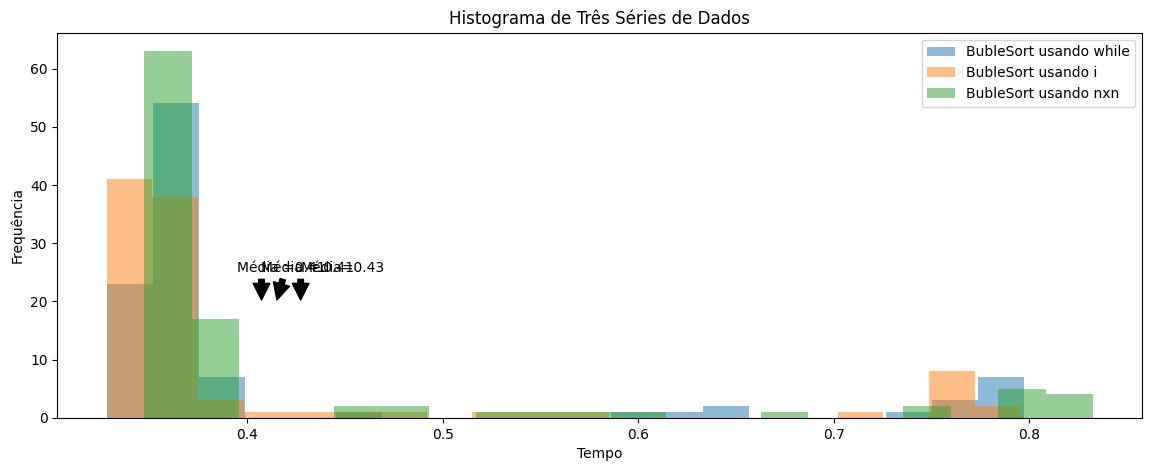

In [ ]:
fig,ax = plt.subplots(figsize=(14,5))
plt.hist(Tempo1, bins=20, alpha=0.5, label='BubleSort usando while')
media1 = Tempo1.mean()
ax.annotate(f'Média ={media1:4.2} ', xy=(media1, 20), xytext=(media1-0.02, 25),arrowprops=dict(facecolor='black', shrink=0.05))
plt.hist(Tempo2, bins=20, alpha=0.5, label='BubleSort usando i')
media2 = Tempo2.mean()
ax.annotate(f'Média = {media2:4.2}', xy=(media2, 20), xytext=(media2, 25),arrowprops=dict(facecolor='black', shrink=0.05))
plt.hist(Tempo3, bins=20, alpha=0.5, label='BubleSort usando nxn')
media3 = Tempo3.mean()
ax.annotate(f'Média={media3:4.2}', xy=(media3, 20), xytext=(media3, 25),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Tempo')
plt.ylabel('Frequência')
plt.title('Histograma de Três Séries de Dados')
plt.legend(loc='upper right')

In [ ]:
# repetindo plotando as curvas com densidade

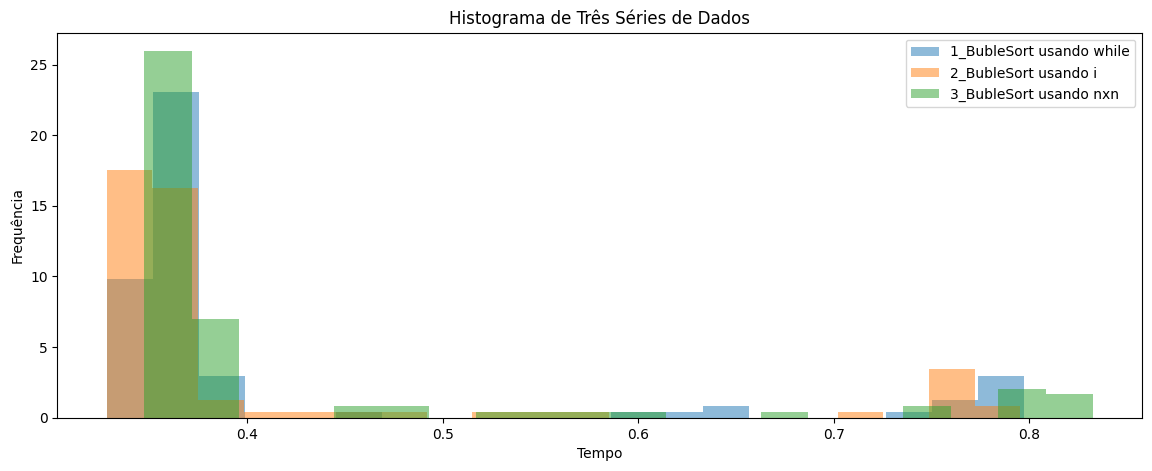

In [23]:
fig,ax = plt.subplots(figsize=(14,5))
plt.hist(Tempo1, bins=20, alpha=0.5,density=True, label='1_BubleSort usando while')
media1 = Tempo1.mean()
sigma = np.std(Tempo1)
x = np.linspace(min(Tempo1), max(Tempo1), 100)
#pdf = norm.pdf(x, media1, sigma)
#plt.plot(x, pdf, 'r', label='Curva Normal While')
ax.annotate(f'Média ={media1:4.2} ', xy=(media1, 120), xytext=(media1-0.02, 130),arrowprops=dict(facecolor='black', shrink=0.05))
plt.hist(Tempo2, bins=20, alpha=0.5,density=True, label='2_BubleSort usando i')
media2 = Tempo2.mean()
sigma = np.std(Tempo2)
x = np.linspace(min(Tempo2), max(Tempo2), 100)
#pdf = norm.pdf(x, media2, sigma)
#plt.plot(x, pdf, 'r', label='Curva BubbleSort i')
ax.annotate(f'Média = {media2:4.2}', xy=(media2, 120), xytext=(media2, 130),arrowprops=dict(facecolor='black', shrink=0.05))
plt.hist(Tempo3, bins=20, alpha=0.5,density=True, label='3_BubleSort usando nxn')
media3 = Tempo3.mean()
sigma = np.std(Tempo3)
x = np.linspace(min(Tempo3), max(Tempo3), 100)
#pdf = norm.pdf(x, media3, sigma)
#plt.plot(x, pdf, 'r', label='Curva Normal n x n')
ax.annotate(f'Média={media3:4.2}', xy=(media3, 120), xytext=(media3, 130),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Tempo')
plt.ylabel('Frequência')
plt.title('Histograma de Três Séries de Dados')
plt.legend(loc='upper right')